In [ ]:
# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# データの表示

In [ ]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [ ]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('/content/drive/MyDrive/study_ai_ml_google/data/titanic_train.csv')
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. ロジスティック回帰
## 不要なデータの削除・欠損値の補完

In [ ]:
# 予測に不要なカラムを削除
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 不要なカラム削除後のデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# nullを含むデータを表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [ ]:
# Ageカラムを中央値で補完
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# nullを含む行を表示（AgeFill列でAgeのnullは補完されている）
titanic_df[titanic_df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


## (1) チケット価格から生死を判別

In [ ]:
# 運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values

# 生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(data1, label1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 予測してみる
model.predict([[61]])

array([0])

In [ ]:
# 予測の確率を出す
model.predict_proba([[61]])

array([[0.50358033, 0.49641967]])

In [ ]:
# ★別の運賃で予測してみる
model.predict([[62]])

array([1])

In [ ]:
# ★運賃=62での予測の確率
model.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

In [ ]:
# 学習結果の係数の値を確認する
#   intercept_: 切片w0
#   coef_: 説明変数の係数w1
print(model.intercept_)
print(model.coef_)

[-0.94131796]
[[0.01519666]]


No handles with labels found to put in legend.


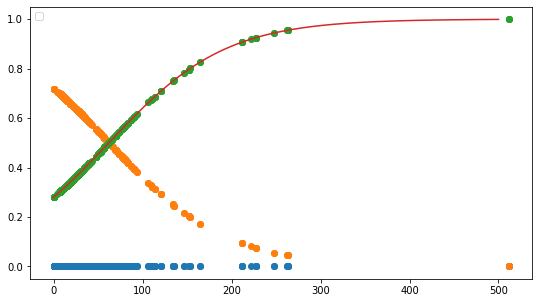

In [ ]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0, 0]

#シグモイド関数
def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000) # start=-1, stop=500, num=3000
plt.figure(figsize=(9,5))
plt.legend(loc=2)
plt.plot(data1, np.zeros(len(data1)), 'o') # 'o'はcircle_markerの指定
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')

## (2) 2変数から生死を判別

In [ ]:
# 性別からGenderというカラムを作成
titanic_df['Gender'] = titanic_df['Sex'].map({'female':0, 'male':1}).astype(int)
titanic_df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0
3,1,1,female,35.0,1,0,53.1000,S,35.0,0


In [ ]:
# 客室の等級を示すPclassと性別を示すGenderを合わせたPclass_Genderを新しく作成
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
titanic_df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1


In [ ]:
# 不要となったデータを削除
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender', 'Age'], axis=1)
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


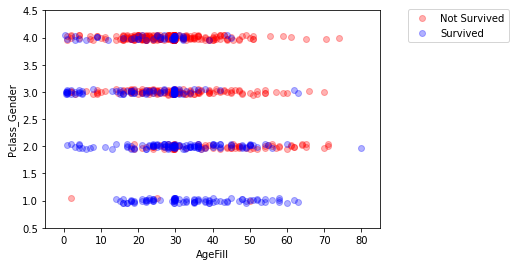

In [ ]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))
# ★Pclass_Genderが低いほど生存。AgeFillは20～40あたりで赤（Not Survived）が多い

In [ ]:
#AgeFillとPclass_Genderのリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values
data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [ ]:
#生死フラグのみのリストを作成
label2 =  titanic_df.loc[:,["Survived"]].values

# AgeFill, Pclass_Genderの2変数でロジスティック回帰モデルを作成
model2 = LogisticRegression()
model2.fit(data2, label2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# AgeFill=10, Pclass_gender=1で予測してみる
# 上記のグラフからおそらく生存の可能性が高そう
model2.predict([[10,1]])

array([1])

In [ ]:
# 予測した確率を表示
model2.predict_proba([[10,1]])

array([[0.03754749, 0.96245251]])

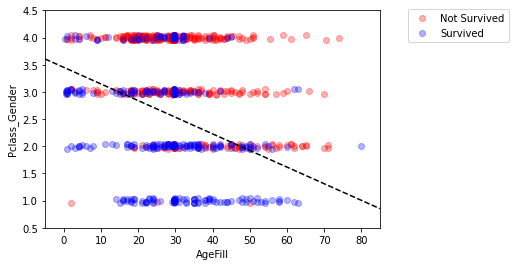

In [ ]:
# 予測結果の線をグラフに表示
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'], 
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'], 
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

# 2変数でのロジスティック回帰で得られたw0, w1グラフを点線で表示
x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

# 2.モデル評価
## 混同行列とクロスバリデーション

In [ ]:
from sklearn.model_selection import train_test_split
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)
traindata1.shape
trainlabel1.shape

(712, 1)

In [ ]:
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)
traindata2.shape
trainlabel2.shape

(712, 1)

In [ ]:
data = titanic_df.loc[:, ].values
label = titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
traindata.shape
trainlabel.shape

(712, 1)

In [ ]:
eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
predict_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predict_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
eval_model1.score(traindata1, trainlabel1)

0.675561797752809

In [ ]:
eval_model1.score(testdata1, testlabel1)

0.6256983240223464

In [ ]:
eval_model2.score(traindata2, trainlabel2)

0.7724719101123596

In [ ]:
eval_model2.score(testdata2, testlabel2)

0.7597765363128491

In [ ]:
from sklearn import metrics
print(metrics.classification_report(testlabel1, predict_eval1))
print(metrics.classification_report(testlabel2, predict_eval2))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75       110
           1       0.55      0.16      0.25        69

    accuracy                           0.63       179
   macro avg       0.59      0.54      0.50       179
weighted avg       0.60      0.63      0.56       179

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       111
           1       0.75      0.56      0.64        68

    accuracy                           0.76       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179



In [ ]:
# confusion_matrix：混同行列
#                  Predicted
#                  Negative   Positive
# Actual Negative     TN         FP
#        Positive     FN         TP
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predict_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predict_eval2)

In [ ]:
confusion_matrix1

array([[101,   9],
       [ 58,  11]])

In [ ]:
confusion_matrix2

array([[98, 13],
       [30, 38]])

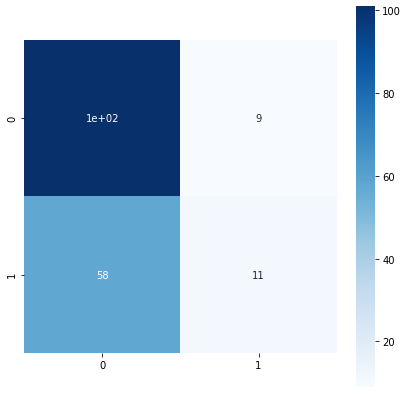

In [ ]:
fig = plt.figure(figsize = (7,7))
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    mask=None)

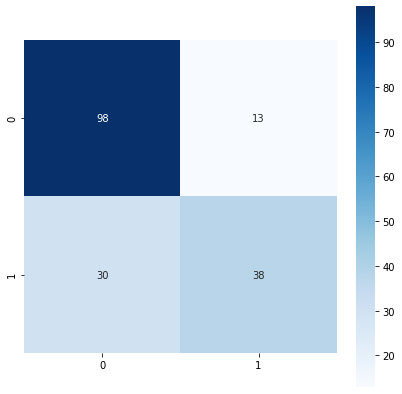

In [ ]:
fig = plt.figure(figsize = (7,7))
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    mask=None)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


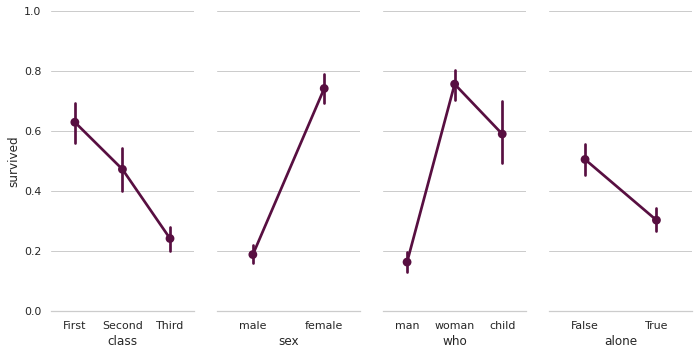

In [ ]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

上記のグラフを見ると、以下の傾向が分かる。
- 部屋の等級の数字が小さいほど生存率が高い(class)
- 女性の方が生存率が高い(sex)
- 生存率は女性、子供、男性の順(who)
- 単身者の方が生存率が低い(alone)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


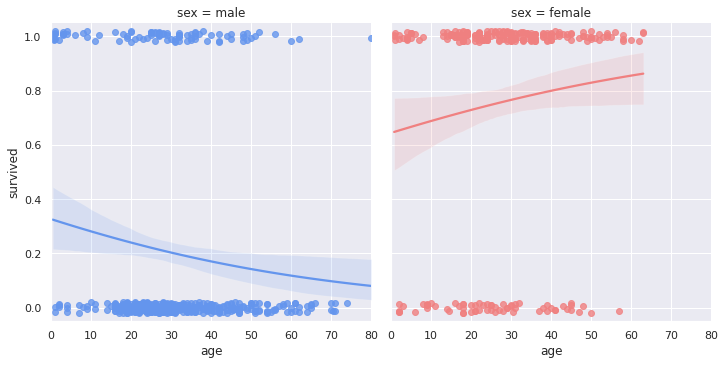

In [ ]:
#Faceted logistic regression

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()